In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import scipy.stats
from sklearn.decomposition import PCA

In [2]:
from data_helpers.wine_quality_data_helper import load_wine_quality_data
from data_helpers.mnist_data_helper import load_mnist_data

/Users/sdale/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
class PCAWrapper:
    NAME = 'PCA'
    def __init__(self, n_components) -> None:
        self.model = PCA(n_components=n_components)
    
    def fit(self, X):
        return self.model.fit(X)
    
    def fit_transform(self, X):
        return self.model.fit_transform(X)

    def transform(self, X):
        return self.model.transform(X)
    
    def get_kurtosis(self, X):
        X_star = self.model.fit_transform(X)
        kurtosis = scipy.stats.kurtosis(X_star).mean()
        return kurtosis

In [4]:
# DATASET_NAME = 'wine_quality'
DATASET_NAME = 'mnist'

METHOD = PCAWrapper
K_FOLDS = 5
SAVE = True

In [5]:
# n = 5000
# X = X[:n]
# y = y[:n]

In [6]:
if DATASET_NAME == 'wine_quality':
    X, y, _, _ = load_wine_quality_data()
elif DATASET_NAME == 'mnist':
    X, y, _, _ = load_mnist_data()
else:
    raise ValueError(f'Unknown dataset: {DATASET_NAME}')

In [7]:
n = X.shape[0] // K_FOLDS
i = 0
# components = 50
components = 100

X_train = np.concatenate([X[:i * n], X[(i + 1) * n:]])
y_train = np.concatenate([y[:i * n], y[(i + 1) * n:]])
X_test = X[i * n:(i + 1) * n]
y_test = y[i * n:(i + 1) * n]

model = METHOD(components)
t0 = time.perf_counter()
model.fit(X_train)
t1 = time.perf_counter()
training_time = t1 - t0

t0 = time.perf_counter()
_ = model.transform(X_test) 
t1 = time.perf_counter()
evaluation_time = t1 - t0

kurtosis = model.get_kurtosis(X_test)

<BarContainer object of 100 artists>

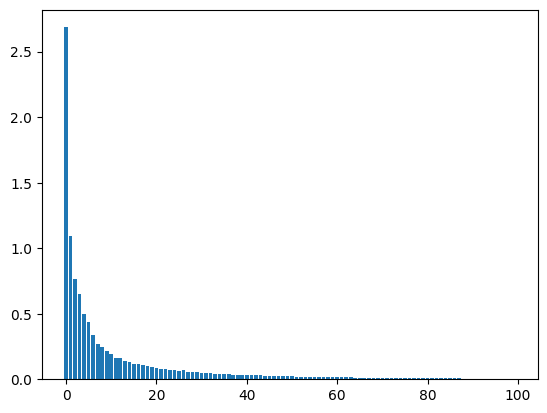

In [8]:
n_samples = X.shape[0]
# We center the data and compute the sample covariance matrix.
X -= np.mean(X, axis=0)
cov_matrix = np.dot(X.T, X) / n_samples
values = []
for eigenvector in model.model.components_:
    values.append(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
plt.bar(range(components), values)
plt.title('Explained Variance')
plt.xlabel('Num Components')

In [11]:
model.model.explained_variance_ratio_.shape

(100,)

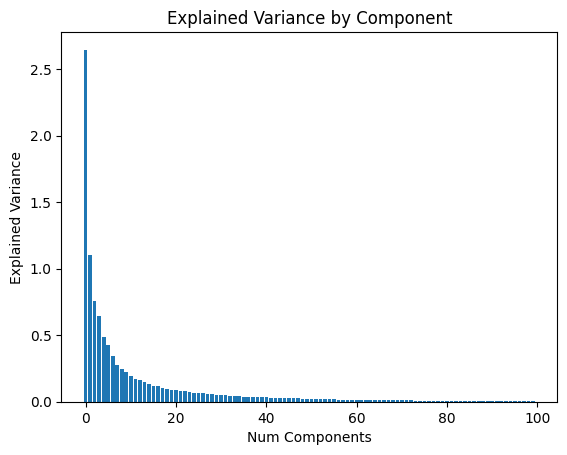

In [17]:
plt.bar(range(model.model.explained_variance_.shape[0]), model.model.explained_variance_)
plt.xlabel('Num Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Component')
plt.savefig(f"figures/{DATASET_NAME}_{METHOD.NAME}_explained_variance.png")

In [9]:
values

[2.685871065753892,
 1.0967047527020104,
 0.7683439900522723,
 0.6511648125961964,
 0.49502738038333716,
 0.4394140045077806,
 0.335169497796385,
 0.2719151245662775,
 0.24264811436926623,
 0.2164272225945804,
 0.19130148762197713,
 0.16205417341720757,
 0.1647403085700744,
 0.14106513927922415,
 0.13280571579764924,
 0.11417666969813711,
 0.11980571839713762,
 0.10626620992756586,
 0.09900105117596533,
 0.09048259209969393,
 0.08410464473586991,
 0.07896229978508387,
 0.07684101726880992,
 0.07025473992186734,
 0.06932282471759875,
 0.06299522333859467,
 0.06715937253547005,
 0.058410029467872326,
 0.05839852093765016,
 0.05343225879030488,
 0.05159418599637119,
 0.048574328599600494,
 0.04650252142757893,
 0.04047567981984307,
 0.04159794953847177,
 0.03915270234336617,
 0.038588978957921606,
 0.03523697001478475,
 0.03321234796244014,
 0.03300651140037323,
 0.030703080019937247,
 0.03124670811727916,
 0.03140051738287636,
 0.029415259593838103,
 0.02808672755783893,
 0.0246689091305